In [3]:
import pandas as pd

data = pd.read_csv("dataset/clean_weather.csv", index_col=0)
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [4]:
data.isnull().sum()

tmax              11
tmin              14
rain             281
tmax_tomorrow     11
dtype: int64

In [5]:
data.fillna({"tmax":data.tmax.median()}, inplace=True)
data.fillna({"tmin":data.tmin.median()}, inplace=True)
data.fillna({"rain":data.rain.median()}, inplace=True)
data.fillna({"tmax_tomorrow":data.tmax_tomorrow.median()}, inplace=True)

In [6]:
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.614947,-0.219145,0.818052
tmin,0.614947,1.000000,-0.019683,0.584489
rain,-0.219145,-0.019683,1.000000,-0.210645
tmax_tomorrow,0.818052,0.584489,-0.210645,1.000000


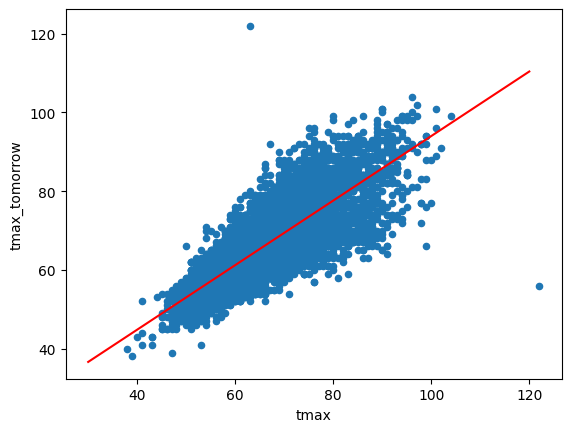

In [7]:
import matplotlib.pyplot as plt

data.plot.scatter('tmax', 'tmax_tomorrow')
predict = lambda x, w = .82, b = 12.02: x * w + b

plt.plot([30,120], [predict(30), predict(120)], "red")


In [8]:
import numpy as np

def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

print(mse(data["tmax_tomorrow"], predict(data["tmax"])))

22.903935450440443


/tmp/ipykernel_5766/3445082901.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratios = ratios.groupby(tmax_bins).mean()
/tmp/ipykernel_5766/3445082901.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_tmax = data['tmax'].groupby(tmax_bins).mean()


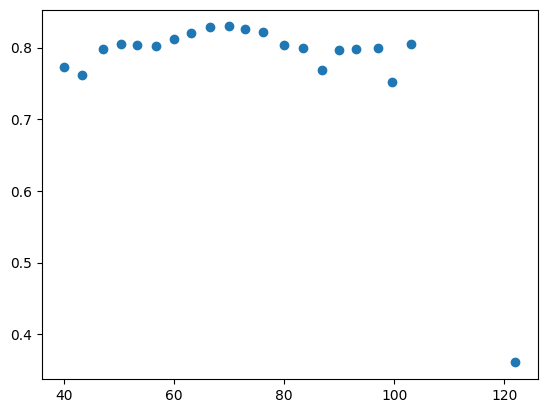

In [9]:
import pandas as pd
tmax_bins = pd.cut(data['tmax'], bins=25)
ratios = ((data['tmax_tomorrow'] - 12.02) / data['tmax'])
binned_ratios = ratios.groupby(tmax_bins).mean()
binned_tmax = data['tmax'].groupby(tmax_bins).mean()
plt.scatter(binned_tmax, binned_ratios)

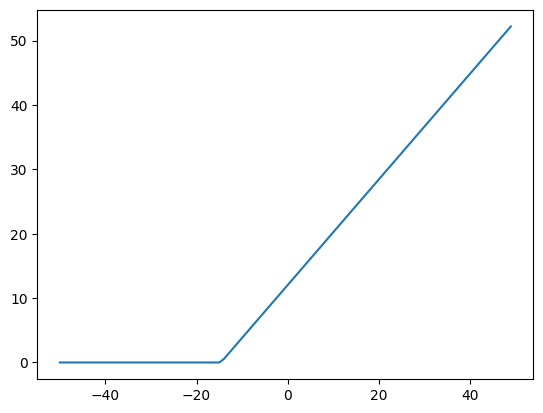

In [10]:
# y = relu (w * x + b)
temps = np.arange(-50, 50)
plt.plot(temps, np.maximum(0,predict(temps)))

(0.0, 40.0)

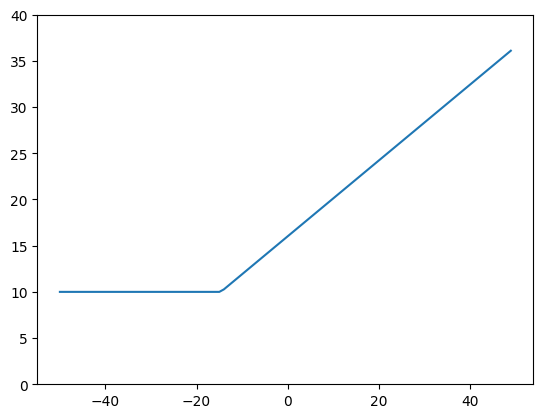

In [11]:
# y = w2 * relu(w1 * x + b1) + b2

temps = np.arange(-50, 50)
layer1 = np.maximum(0,predict(temps))
layer2 = predict(layer1, .5, 10)
plt.plot(temps, layer2)
plt.ylim(0, 40)

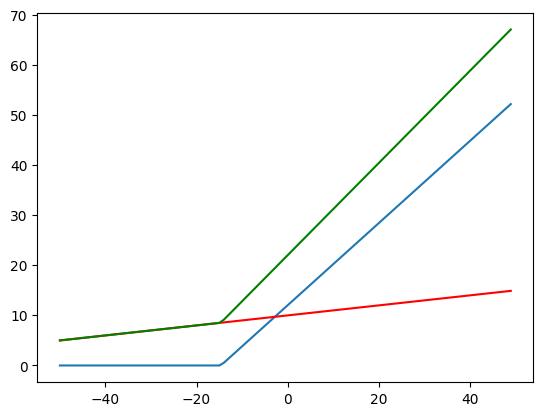

In [12]:
layer1_1 = np.maximum(0,predict(temps))
layer1_2 = np.maximum(0,predict(temps,.1,10))
plt.plot(temps, layer1_1)
plt.plot(temps, layer1_2, "red")
plt.plot(temps, layer1_1 + layer1_2, "green")

In [13]:
input = np.array([[80], [90], [100], [-20], [-10]])
l1_weights = np.array([[.82, 0.1]])
l1_bias = np.array([[12.02, 10]])

l1_output = input @ l1_weights + l1_bias
print(l1_output)

[[77.62 18.  ]
 [85.82 19.  ]
 [94.02 20.  ]
 [-4.38  8.  ]
 [ 3.82  9.  ]]


In [14]:
l1_activated = np.maximum(l1_output, 0)
print(l1_activated)

[[77.62 18.  ]
 [85.82 19.  ]
 [94.02 20.  ]
 [ 0.    8.  ]
 [ 3.82  9.  ]]


In [15]:
l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])
l2_output = l1_activated @ l2_weights + l2_bias
print(l2_output)

[[47.41]
 [51.71]
 [56.01]
 [ 6.6 ]
 [ 8.71]]


In [16]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [17]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

In [18]:
mse(tmax_tomorrow, l2_output)

array([[1266.6481],
       [1390.5441],
       [1520.2201],
       [ 817.96  ],
       [ 313.6441]])

In [25]:
def mse_grad(actual, predicted):
    return predicted - actual

output_gradient = mse_grad(tmax_tomorrow, l2_output)
print(output_gradient)
print(l1_activated.T)

[[-35.59]
 [-37.29]
 [-38.99]
 [ 28.6 ]
 [ 17.71]]
[[77.62 85.82 94.02  0.    3.82]
 [18.   19.   20.    8.    9.  ]]


In [23]:
l2_w_gradient =  l1_activated.T @ output_gradient
print(l2_w_gradient)

[[-9560.9112]
 [-1740.74  ]]


In [28]:
l2_b_gradient =  np.mean(output_gradient, axis=0)
print(l2_b_gradient)

[-13.112]


In [30]:
# Set a learning rate
lr = 1e-5
# Update the bias values
l2_bias = l2_bias - l2_b_gradient * lr
# Update the weight values
l2_weights = l2_weights - l2_w_gradient * lr

print(f"l2_bias: {l2_bias}")
print(f"l2_weights: {l2_weights}")

l2_bias: [[5.00026224]]
l2_weights: [[0.69121822]
 [0.2348148 ]]


In [ ]:
# Calculate the gradient on the output of layer 1
l1_activated_gradient = output_gradient @ l2_weights.T

print(l1_activated_gradient)

[[-24.60045659  -8.35705873]
 [-25.77552757  -8.75624389]
 [-26.95059855  -9.15542905]
 [ 19.76884121   6.71570328]
 [ 12.24147475   4.15857011]]


In [32]:
l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)
print(l1_output_gradient)

[[-24.60045659  -8.35705873]
 [-25.77552757  -8.75624389]
 [-26.95059855  -9.15542905]
 [  0.           6.71570328]
 [ 12.24147475   4.15857011]]


In [34]:
# Calculate gradients wrt weights and biases for layer 1
l1_w_gradient =  input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

print(f"l1_weights: {l1_weights}")
print(f"l1_bias: {l1_bias}")

l1_weights: [[0.96210617 0.15096139]]
l1_bias: [[12.02026034 10.00006158]]


In [58]:
import numpy as np
from sklearn.preprocessing import StandardScaler
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data so relu works better
# All temperature values in the original dataset are over 0, so relu won't do much for several epochs
# Scaling will make some of the input data negative
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

/home/joseph/Source/Sample/ML/Basics/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append([
            np.random.rand(inputs[i-1], inputs[i]) / 5 - .1,
            np.ones((1,inputs[i]))
        ])
    return layers

# This will initialize weights and biases for a 3-layer neural network with 10 units in the first layer, 10 in the second, and 1 in the final
# The first number (3) is our number of input features
layer_conf = [3,10,10,1]

In [60]:
def forward(batch, layers):
    hidden = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        # Store the forward pass hidden values for use in backprop
        hidden.append(batch.copy())
    return batch, hidden

In [61]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

def mse_grad(actual, predicted):
    return predicted - actual

In [62]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)

        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr
        
        grad = grad @ layers[i][0].T
    return layers

In [63]:
from statistics import mean

lr = 1e-6
epochs=10
batch_size = 8

layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]
        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss.append(np.mean(loss ** 2))

        layers = backward(layers, hidden, loss, lr)


    valid_preds, _ = forward(valid_x, layers)

    print(f"Epoch: {epoch} Train MSE: {mean(epoch_loss)} Valid MSE: {np.mean(mse(valid_preds,valid_y))}")

Epoch: 0 Train MSE: 3326.3297335049374 Valid MSE: 1755.4470602153526
Epoch: 1 Train MSE: 362.89497608319425 Valid MSE: 26.840395556176702
Epoch: 2 Train MSE: 23.59013761561438 Valid MSE: 21.54847346217074
Epoch: 3 Train MSE: 22.519173092178022 Valid MSE: 20.977840875811395
Epoch: 4 Train MSE: 22.207601267843987 Valid MSE: 20.85514157403247
Epoch: 5 Train MSE: 22.126903635916047 Valid MSE: 20.833498828792294
Epoch: 6 Train MSE: 22.10484058765798 Valid MSE: 20.832659787310984
Epoch: 7 Train MSE: 22.097770811474685 Valid MSE: 20.83508931161226
Epoch: 8 Train MSE: 22.094559305598253 Valid MSE: 20.837343776177054
Epoch: 9 Train MSE: 22.092595142460873 Valid MSE: 20.839140720288018
